## 1.-Get the dependencies ready

We will basically need the essentials: numpy for some calculations and data conversions, pandas for using DataFrames, scipy's convexhull to create the boundary and matplotlib to make a visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.spatial import ConvexHull
from math import sqrt, ceil

/home/rr/anaconda2/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rr/anaconda2/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 2.-Create the points and their boundary

In [2]:
points = np.random.rand(30, 2)   # 30 random points in 2-D
points_df = pd.DataFrame(points)
x_values = points_df[0]
y_values = points_df[1]

hull = ConvexHull(points)
hull_df = pd.DataFrame(hull.vertices).head(4)

display(points[hull_df,0])

array([[0.85538658],
       [0.91698152],
       [0.885089  ],
       [0.70486944]])

In [3]:
convex_x_points = []
convex_y_points = []
convex_x_points = np.array(convex_x_points)
convex_y_points = np.array(convex_y_points)

convex_x_points = np.append(convex_x_points, points[hull_df,0])
convex_y_points = np.append(convex_y_points, points[hull_df,1])

display(convex_x_points)

array([0.85538658, 0.91698152, 0.885089  , 0.70486944])

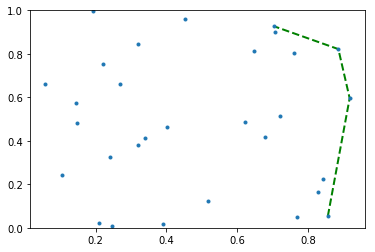

In [4]:
plt.plot(points[hull_df,0], points[hull_df,1], 'g--', lw=2)
plt.plot(x_values, y_values, '.')
plt.ylim(0,1)
plt.show()

## 3.-Get the polynomial regression

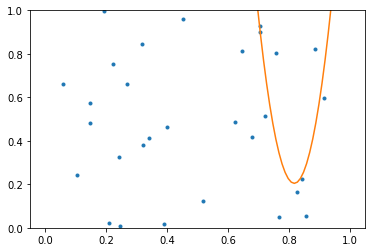

In [5]:
z = np.polyfit(convex_x_points, convex_y_points, 2)
p = np.poly1d(z)
xp = np.linspace(0, 1, 100)
_ = plt.plot(x_values, y_values, '.', xp, p(xp), '-')
plt.ylim(0,1)
plt.show()

## 4.-Optimize the integral using the adaptive trapezoid rule
The function adaptivetrap takes the polynomial we defined above and integrates it using the adaptive trapezoid rule from 0 to 10 with an error tolerance of 1E-5.

In [6]:
def ti1(f,a,b):
    return ((b-a)/2)*(f(a)+f(b))

def diff2(f,x,h=1E-6):
    r=(f(x-h)-2*f(x) + f(x+h))/float(h*h)
    return r
    
def trapezint(f,a,b,n):
    h=(b-a)/n
    sum=0    
    part1=(0.5)*h*(f(a)+f(b))
    for i in range(1,n):
        xi=a+i*h
        sum=sum+f(xi)        
    return part1+h*sum

def adaptivetrap(f,a,b,ep):
    
    max=0    
    step=float(abs(a-b)/1000)
    i=0
    while (i<1000):
        i=i+1        
        adj=a;
        adj=a+step*i;
        dval=diff2(f,adj)
        if(abs(dval)>max):
            max=abs(dval)
            
    h=sqrt(12*ep)*((b-a)*max)**.5
    n=(b-a)/h        
    return trapezint(f,a,b,int(ceil(n)))
    
print (adaptivetrap(p,0.0,10.0,1E-5))

14335.559708511528
